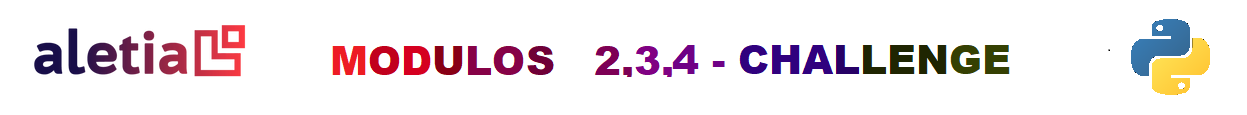

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

## Reto sobre overfitting & underfitting

Aproximar la función:

$Y = cos(1.5\pi X)$ - - - - - - - - - - - - - - - - ${}_{ecuación} {}_{1}$

utilizando una **regresión lineal** y con solo 30 observaciones de esta función

**Pregunta 1:** ¿Cuales son las principales complicaciones de este planteamiento?

In [2]:
# Escribe tu respuesta a la pregunta 1 en esta celda de código:

print('Aqui tu respuesta\nHint: Revisar los supuestos de la regresión lineal\n')
print ('\033[1m' + 'RESPUESTA:\n')
print('\033[0m' + 'Primero que nada entre los supuestos de la regresión lineal están:\n\n1-. Que la variable\
 dependiente debe de ser numerica y continua.\n2.- La mayoria de las variables independientes deben de ser\
 numericas y no categoricas.\n\nEn este ejemplo como tal no tenemos esa información, podemos decir que si cumple\
 ya que la funcion es numerica. Sin embargo para reponder la pregunta, las complicaciones que tiene este\
 planteamiento son:\n\n1.- La función Coseno no es para nada lineal.\n2.- 30 observaciones son muy pocas.\n3.-\
 Como no es una funcion lineal, se necesita de una función cuadratica o cubica, por lo que, como su nombre lo\
 dice (regresión ' + '\033[1m' + 'LINEAL' + '\033[0m' + '), se estaría escogiendo un modelo erroneo.\n\nAsí que\
 se tiene que buscar otra solucion y lo ideal sería agregando grados al modelo, ya que, agregando variables no\
 serviría, o en todo caso, checando con otro tipo de modelo (logaritmica talvez)')

Aqui tu respuesta
Hint: Revisar los supuestos de la regresión lineal

RESPUESTA:

Primero que nada entre los supuestos de la regresión lineal están:

1-. Que la variable dependiente debe de ser numerica y continua.
2.- La mayoria de las variables independientes deben de ser numericas y no categoricas.

En este ejemplo como tal no tenemos esa información, podemos decir que si cumple ya que la funcion es numerica. Sin embargo para reponder la pregunta, las complicaciones que tiene este planteamiento son:

1.- La función Coseno no es para nada lineal.
2.- 30 observaciones son muy pocas.
3.- Como no es una funcion lineal, se necesita de una función cuadratica o cubica, por lo que, como su nombre lo dice (regresión LINEAL), se estaría escogiendo un modelo erroneo.

Así que se tiene que buscar otra solucion y lo ideal sería agregando grados al modelo, ya que, agregando variables no serviría, o en todo caso, checando con otro tipo de modelo (logaritmica talvez)


Generemos 30 datos a partir de la función planteada en la ecuación 1

Adicionalmente para complicarle un poco el trabajo al modelo agreguemos un poco de ruido

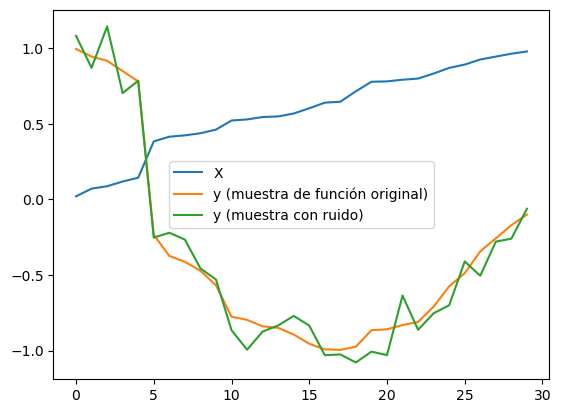

In [3]:
np.random.seed(0)
n_samples = 30

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))
y_sin_ruido = true_fun(X)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.plot(X, label='X')
plt.plot(y_sin_ruido, label='y (muestra de función original)')
plt.plot(y, label='y (muestra con ruido)')
plt.legend();

Recordando el planteamiento de la regresión lineal, intentaremos estimar $y$ a partir de $X$, es decir: $\hat{y}=\theta^TX$

Sin embargo la respuesta de la pregunta 1 nos lleva a la conclusión de que no es posible estimar $y$ a partir de $x$ con una regresión lineal.

Pero en el análisis de datos existen algunos artilugios matemáticos para solucionar este tipo de problemas.

Lo que haremos es cambiar el planteamiento.
Además de usar $X$ usaremos algunas transformaciones no lineales de $X$ y las usaremos como features adicionales.

Por ejemplo: $X^2$, $X^3$, $X^4$, $...$, $X^n$ (transformaciones polinomiales)

Los ejemplos anteriores son transformaciones polinomiales de grado 2, 3, 4, ..., n

Y esto nos lleva a...

**Pregunta 2**: ¿Cuántos grados son necesarios?

In [13]:
# Escribe tu respuesta a la pregunta 2 en esta celda de código:

print('Aqui tu respuesta\nHint: Revisar tema: Función de error/costo en la regresión lineal\n')
print ('\033[1m' + 'RESPUESTA:\n')
print('\033[0m' + 'Para saber o conocer cuantos grados de libertad son los necesarios, o mejor dicho los\
 correctos, se necesita conocer un erroR (o varios si se puede), entre los mas comunes estan:\n\n1.- MSE (Mean\
 Standar Error)\n2.- R^2 (Coefficient of Determination)\n3.- RSE (Residual Standard Error)\n\nDe estos 3, el\
 mejor para las transformaciones polinomiales es el ' + '\033[1m' + 'MSE (Mean Stardar Error), ' + '\033[0m' +
 'pero puede ser complementado por el R^2.\n\nDespués se tiene que ver tanto en el Set de "Training" como en\
 el de "Testing" 2 cosas importantes respectivamente:\n\n1.- A partir de que grado el error comienza a disminuir\
 muy poco, es decir, ya no es relevante seguir agregando mas grados y mas complejidad al modelo. <---Training Data\
 \n2.- A partir de que grado el error en vez de disminuir, comienza a aumentar. <---Testing Data\n\nY ahora si,\
 se puede tomar la decisión de que grado es el correcto y necesario para el modelo, osea que no se encuentra\
 ni en UNDERFITTING ni en OVERFITTING sino en el CORRECTFITTING, visualizando tanto las graficas como el dato\
 del error.')

Aqui tu respuesta
Hint: Revisar tema: Función de error/costo en la regresión lineal

RESPUESTA:

Para saber o conocer cuantos grados de libertad son los necesarios, o mejor dicho los correctos, se necesita conocer un erroR (o varios si se puede), entre los mas comunes estan:

1.- MSE (Mean Standar Error)
2.- R^2 (Coefficient of Determination)
3.- RSE (Residual Standard Error)

De estos 3, el mejor para las transformaciones polinomiales es el MSE (Mean Stardar Error), pero puede ser complementado por el R^2.

Después se tiene que ver tanto en el Set de "Training" como en el de "Testing" 2 cosas importantes respectivamente:

1.- A partir de que grado el error comienza a disminuir muy poco, es decir, ya no es relevante seguir agregando mas grados y mas complejidad al modelo. <---Training Data 
2.- A partir de que grado el error en vez de disminuir, comienza a aumentar. <---Testing Data

Y ahora si, se puede tomar la decisión de que grado es el correcto y necesario para el modelo, osea que

A continuación te mostramos una manera de usar [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) para explorar hiperparámetros.

Los pipelines son muy útiles al momento de explorar hiperparámetros (en este caso el hiperparámetro que estamos explorando es el máximo grado de libertad en la transformación de la variable $X$ necesario para estimar $y$)

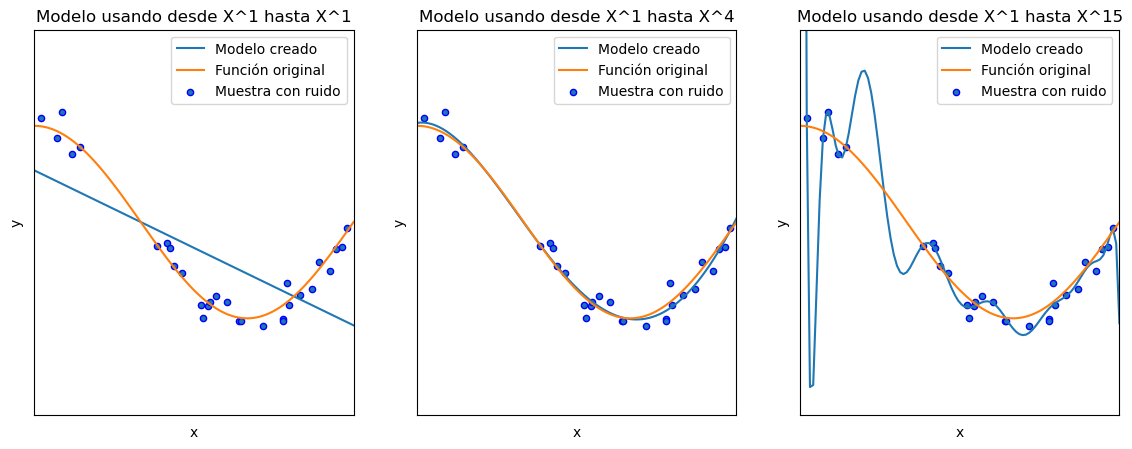

In [5]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression),])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo creado")
    plt.plot(X_test, true_fun(X_test), label="Función original")
    plt.scatter(X, y, edgecolor="b", s=20, label="Muestra con ruido")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Modelo usando desde X^1 hasta X^{}".format(degrees[i]))
plt.show()

En las 3 gráficas anteriores se hacen evidentes los conceptos de *underfitting*, *correct fit* y *overfitting* transformando $X$ desde el grado 1 hasta los grados 1, 4, 15 respectivamente.

Estos números con el máximo grado fueron determinados al **tanteo** probando desde 1 hasta 15 y este es un procedimiento válido para encontrar el fit correcto.

Sin embargo tiene dos desventajas muy importantes:
1. Es necesario ver la gráfica para determinar si el fit es el correcto (esto no es posible cuando la dimensión de X es mayor a 1).
2. Pierde la posibilidad de ser automatizado.

Si respondiste la pregunta 2, sabrás que poder calcular el error con cada hiperparámetro probado te da la posibilidad de saber cual de los hiperparámetros minimiza el error.

Además es importante mirar no solo el error en el set de entrenamiento, sino también en el de prueba. A continuación te mostramos la tan famosa gráfica de ***bias*** vs ***variance***:

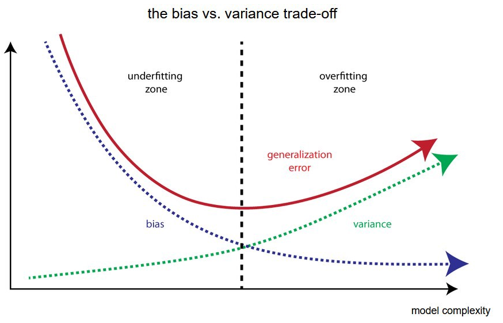

**Pregunta 3:** ¿Como podemos modificar el código anterior para incluir el cálculo del error y sistematizar la selección del grado máximo polinomial en la transformación de $X$?

In [14]:
# Escribe tu respuesta a la pregunta 3 en esta celda de código:

print('Aqui tu respuesta\nHint: Revisar tema: Overfitting/Underfitting\n')
print ('\033[1m' + 'RESPUESTA:\n')
print('\033[0m' + 'Se tendría que realizar una funcion para algún error escogido, en este caso sería el MSE\
 (Mean Standard Error), la cual se define a continuación:\n')

print('\033[1m' + 'def MSE(y_true,y_predicted):\n' +
'    y_true = np.array(y_true)\n' +
'    y_predicted = np.array(y_predicted)\n' +
'    mse = np.sum(np.square(y_true - y_predicted))/ (len(y_true))\n' +
'    return mse\n\n' +
'y_pred = pipeline.predict(X_test[:, np.newaxis])\n' +
'y_orig = true_fun(X_test)\n' +
'mse = MSE(y_orig,y_pred)\n\n' +
'print(f"MSE = {mse}")')

    

Aqui tu respuesta
Hint: Revisar tema: Overfitting/Underfitting

RESPUESTA:

Se tendría que realizar una funcion para algún error escogido, en este caso sería el MSE (Mean Standard Error), la cual se define a continuación:

def MSE(y_true,y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    mse = np.sum(np.square(y_true - y_predicted))/ (len(y_true))
    return mse

y_pred = pipeline.predict(X_test[:, np.newaxis])
y_orig = true_fun(X_test)
mse = MSE(y_orig,y_pred)

print(f"MSE = {mse}")


## Este codigo sirve para ir jugando con los GRADOS de la ecuación, solo se necesita cambiar el numero en una de las lineas de codigo después de "degree="

MSE = 0.192508849000798


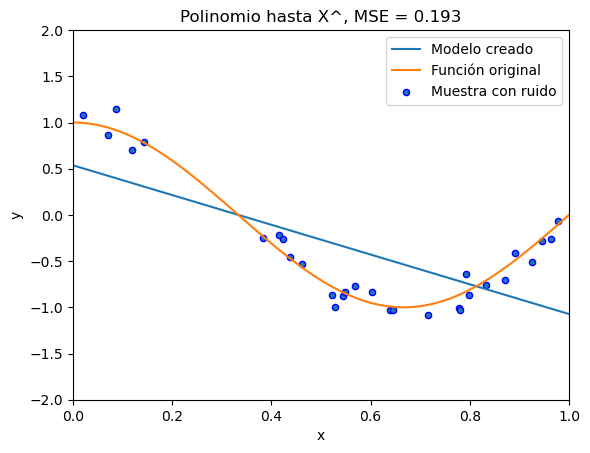

In [7]:
def MSE(y_true,y_predicted):
    
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    mse = np.sum(np.square(y_true - y_predicted))/ (len(y_true))
    return mse

polynomial_features = PolynomialFeatures(degree=1, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression),])
pipeline.fit(X[:, np.newaxis], y)

y_pred = pipeline.predict(X_test[:, np.newaxis])
y_orig = true_fun(X_test)
mse = MSE(y_orig,y_pred)

plt.plot(X_test, y_pred, label="Modelo creado")
plt.plot(X_test, y_orig, label="Función original")
plt.scatter(X, y, edgecolor="b", s=20, label="Muestra con ruido")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
#plt.title("Modelo usando desde X^1 hasta X^{}".format(degrees[i]))
plt.title(f"Polinomio hasta X^, MSE = {round(mse,3)}")
print(f"MSE = {mse}")

## Este codigo es el que pide la pregunta pero ya modificado. Al final se puede observar arriba de las gráficas en el titulo cual es el orden (grado) de la ecuación junto con su error redondeado

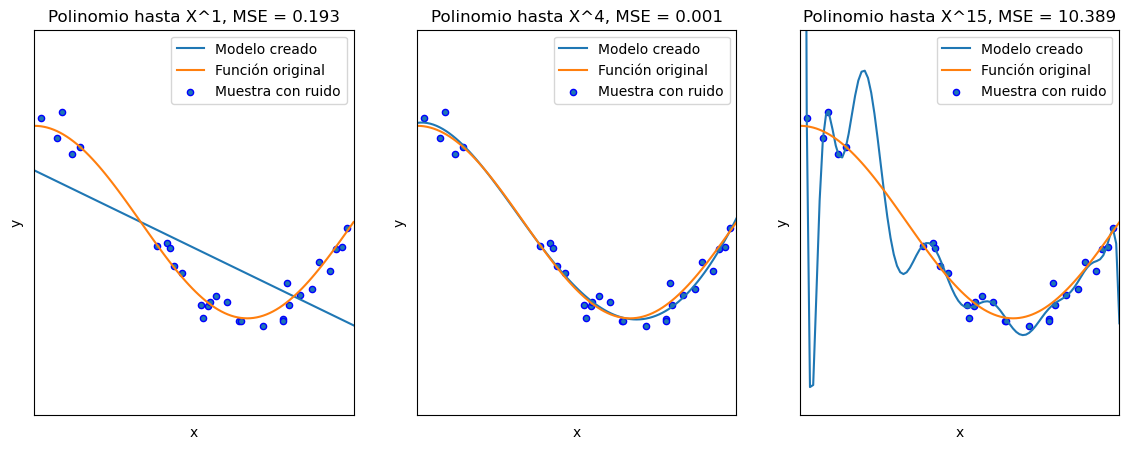

In [8]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression),])
    pipeline.fit(X[:, np.newaxis], y)

    
    
    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    y_orig = true_fun(X_test)
    mse = MSE(y_orig,y_pred)
    plt.plot(X_test, y_pred, label="Modelo creado")
    plt.plot(X_test, y_orig, label="Función original")
    plt.scatter(X, y, edgecolor="b", s=20, label="Muestra con ruido")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    #plt.title("Modelo usando desde X^1 hasta X^{}".format(degrees[i]))
    plt.title(f"Polinomio hasta X^{degrees[i]}, MSE = {round(mse,3)}")
plt.show()

**Pregunta 4:** ¿Cuales son otros hiperparámetros que incrementan la complejidad de los modelos? en el caso de:
- Regresión logística
- Árboles de decisión
- K-medias
- Redes neuronales

In [70]:
# Escribe tu respuesta a la pregunta 4 en esta celda de código:

print('Aqui tu respuesta\nHint: Revisar tema: Overfitting/Underfitting\n')

print ('\033[1m' + 'RESPUESTA:\n')

print('\033[0m' + 'La pregunta es muy compleja a mi parecer y para conocer todos esos hiperparámetros se\
 necesita mucho tiempo y mucho más conocimiento de MACHINE y DEEP LEARNING, así como estar practicando, jugando\
 o trabajando en estos temas frecuentemente y adquirir más experiencia ya que una cosa es conocer los\
 hiperparámetros de cierta biblioteca o función y otra conocer los hiperparámetros que aumentan la complejidad\
 de los modelos, sin embargo, me dí a la tarea de investigar los parametros y atributos de los temas\
 mencionados y así poco a poco poder realizar pipelines.\n')

print(f'\033[1m-Regresión logística:\033[0m https://scikit-learn.org/stable/modules/generated/sklearn.\
linear_model.LogisticRegression\n')

print(f'\033[1m-Árboles de decisión:\033[0m https://scikit-learn.org/stable/modules/generated/sklearn.\
ensemble.BaggingClassifier\n')

print(f'\033[1m-K-medias:\033[0m https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans\n')

print(f'\033[1m-Redes neuronales:\033[0m https://medium.com/ml-book/neural-networks-hyperparameter-tuning-in\
-tensorflow-2-0-a7b4e2b574a1\nhttps://www.tensorflow.org/tutorials/keras/keras_tuner\n')

print(f'\033[1mEXTRAS:\n')

print(f'\033[1m-Regresión lineal:\033[0m https://scikit-learn.org/stable/modules/generated/sklearn.\
linear_model.LinearRegression\n')

print(f'\033[1m-Transformaciones polinomiales:\033[0m https://scikit-learn.org/stable/modules/generated/sklearn.\
preprocessing.PolynomialFeatures\n')

Aqui tu respuesta
Hint: Revisar tema: Overfitting/Underfitting

RESPUESTA:

La pregunta es muy compleja a mi parecer y para conocer todos esos hiperparámetros se necesita mucho tiempo y mucho más conocimiento de MACHINE y DEEP LEARNING, así como estar practicando, jugando o trabajando en estos temas frecuentemente y adquirir más experiencia ya que una cosa es conocer los hiperparámetros de cierta biblioteca o función y otra conocer los hiperparámetros que aumentan la complejidad de los modelos, sin embargo, me dí a la tarea de investigar los parametros y atributos de los temas mencionados y así poco a poco poder realizar pipelines.

-Regresión logística: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression

-Árboles de decisión: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier

-K-medias: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans

-Redes neuronales: https://medium.com/ml-book/neural-

## Reto sobre *end-to-end machine learning model*

El objetivo principal de esta parte del reto es **dimensionar la importancia de cada parte del proceso de creación de un modelo**.

**Paso 1:** Seleccióna el reto. A continuación te presentamos 10 posibles retos a resolver:
1. [Mortalidad cancer 1](https://data.world/nrippner/cancer-linear-regression-model-tutorial)
2. [Factor de riesgo de salud](https://www.telusinternational.com/articles/10-open-datasets-for-linear-regression#:~:text=CDC%20data%3A%20nutrition%2C%20physical%20activity%2C%20obesity)
3. [Industria pesquera](https://www.kaggle.com/aungpyaeap/fish-market)
4. [Precios de seguros médicos](https://www.kaggle.com/mirichoi0218/insurance)
5. [Mercado de valores de Nueva York](https://)
6. [Mortalidad cancer 2](https://)
7. [Precios de casas](https://)
8. [Calidad del vino](https://)
9. [Precios de automóviles](https://)
10. [Esperanza de vida](https://)

**Mas información sobre los datasets:**

1. Regresión lineal del cáncer

Este conjunto de datos incluye datos tomados de cancer.gov sobre muertes por cáncer en los Estados Unidos. Junto con el conjunto de datos, el autor incluye un recorrido completo sobre cómo obtuvieron y prepararon los datos, su análisis exploratorio, selección de modelos, diagnóstico e interpretación.

2. Datos de los CDC: nutrición, actividad física, obesidad

Del Sistema de Vigilancia de Factores de Riesgo del Comportamiento de los CDC, este conjunto de datos incluye información sobre la actividad física, el peso y la dieta promedio de un adulto.

3. Conjunto de datos del mercado de pescado para la regresión

Creado para la regresión lineal múltiple y el análisis multivariado, el conjunto de datos del mercado de pescado contiene información sobre las especies de pescado comunes en las ventas del mercado. El conjunto de datos incluye las especies de peces, el peso, la longitud, la altura y el ancho.

4. Costos del seguro médico

Este conjunto de datos se inspiró en el libro Machine Learning with R de Brett Lantz. Los datos contienen información médica y costos facturados por las compañías de seguros de salud. Contiene 1338 filas de datos y las siguientes columnas: edad, sexo, IMC, niños, fumador, región y cargos del seguro.

5. Conjunto de datos de la Bolsa de Valores de Nueva York

Creado como un recurso para el análisis técnico, este conjunto de datos contiene datos históricos del mercado de valores de Nueva York. El conjunto de datos viene en cuatro archivos CSV: precios, precios ajustados por división, valores y fundamentos. Con estos datos, puede experimentar con modelos predictivos, regresión lineal móvil y más.

6. Desafío de regresión OLS

El desafío de regresión OLS le asigna la tarea de predecir las tasas de mortalidad por cáncer en los condados de EE. UU. El conjunto de datos contiene datos de cancer.gov, Clinicaltrials.gov y la Encuesta sobre la comunidad estadounidense. Está en formato CSV e incluye la siguiente información sobre el cáncer en los EE. UU.: tasas de mortalidad, casos informados, nombre del condado de EE. UU., ingresos por condado, población, datos demográficos y más.

7. Predicción de precios inmobiliarios

Este conjunto de datos inmobiliarios se creó para análisis de regresión, regresión lineal, regresión múltiple y modelos de predicción. Incluye la fecha de compra, la edad de la casa, la ubicación, la distancia a la estación MRT más cercana y el precio de la casa por unidad de área.

8. Calidad del vino tinto

Desde el repositorio de aprendizaje automático de UCI, este conjunto de datos se puede usar para tareas de clasificación y modelado de regresión. El conjunto de datos incluye información sobre las propiedades químicas de los diferentes tipos de vino y cómo se relacionan con la calidad general.

9. Conjunto de datos del vehículo de CarDekho

Un conjunto de datos útil para la predicción de precios, este conjunto de datos de vehículos incluye información sobre automóviles y motocicletas que figuran en CarDekho.com. Los datos están en un archivo CSV que incluye las siguientes columnas: modelo, año, precio de venta, precio de exposición, kilómetros recorridos, tipo de combustible, tipo de vendedor, transmisión y número de propietarios anteriores.

10. Estadísticas de la OMS sobre esperanza de vida

Este conjunto de datos contiene información compilada por la Organización Mundial de la Salud y las Naciones Unidas para rastrear los factores que afectan la esperanza de vida. Los datos contienen 2938 filas y 22 columnas. Las columnas incluyen: país, año, estado de desarrollo, mortalidad de adultos, esperanza de vida, muertes infantiles, consumo de alcohol per cápita, gasto del país en salud, cobertura de inmunización, IMC, muertes de menores de 5 años, muertes por VIH/SIDA, PIB, población, condición corporal, información sobre ingresos y educación.

**Paso 2:** Consigue los datos e importalos a un dataframe llamado **df**

In [12]:
# Escribe aquí tu código
df = 

**NOTA:** DE AQUÍ EN ADELANTE (EN CADA PASO) DEBERÁS INCLUIR UN PEDAZO DE CÓDIGO PARA SEPARAR TU DATASET EN ENTRENAMIENTO Y PRUEBA. EL SCORE CALCULADO DEBERÁ SER DEL SET DE PRUEBA

**Paso 3:** Selecciona algunos features al azar y crea una regresión lineal, luego calcula el score para conocer el performance del modelo

In [ ]:
target = # Escribe aquí tu código
ls_features = [# Escribe aquí tu código

X = df[ls_features]
y = df[target]
reg = LinearRegression().fit(X, y)

score_1 = reg.score(X, y)
print('score_1:',score_1)

**Paso 4:** Realiza un análisis exploratorio, luego realiza el trabajo que ya conoces de limpieza, imputación de valores en los vacíos, eliminación de outliers, etc. Finalmente elije las mismas variables que usaste en el paso 3 (ya limpias) y vuelve a crear un modelo de regresión lineal calculando su score.

In [ ]:
# Escribe aquí tu código

target = # Escribe aquí tu código
ls_features = [# Escribe aquí tu código

X = df[ls_features]
y = df[target]
reg = LinearRegression().fit(X, y)

score_2 = reg.score(X, y)
print('score_2:',score_2)

**Paso 5:** Crea nuevas variables y transforma las ya existentes si es necesario y selecciona las variables mas reelevantes con alguna técnica de selección de variables. Luego crea nuevamente un modelo de regresión lineal calculando su score.

In [ ]:
# Escribe aquí tu código

target = # Escribe aquí tu código
ls_features = [# Escribe aquí tu código

X = df[ls_features]
y = df[target]
reg = LinearRegression().fit(X, y)

score_3 = reg.score(X, y)
print('score_3:',score_3)

**Paso 6:** Realiza un procedimiento de escalamiento en tus variables. Luego vuelve a crear un modelo de regresión lineal calculando su score.

In [ ]:
# Escribe aquí tu código

target = # Escribe aquí tu código
ls_features = [# Escribe aquí tu código

X = df[ls_features]
y = df[target]
reg = LinearRegression().fit(X, y)

score_4 = reg.score(X, y)
print('score_4:',score_4)

**Paso 7:** Determina si es necesario darle complejidad a las variables realizando transformaciones no lineales. Luego vuelve a crear un modelo de regresión lineal calculando su score.



In [ ]:
# Escribe aquí tu código

target = # Escribe aquí tu código
ls_features = [# Escribe aquí tu código

X = df[ls_features]
y = df[target]
reg = LinearRegression().fit(X, y)

score_5 = reg.score(X, y)
print('score_5:',score_5)

**Paso 8:** Realiza un procedimiento de reducción de la dimensionalidad. Luego vuelve a crear un modelo de regresión lineal calculando su score.


In [ ]:
# Escribe aquí tu código

target = # Escribe aquí tu código
ls_features = [# Escribe aquí tu código

X = df[ls_features]
y = df[target]
reg = LinearRegression().fit(X, y)

score_6 = reg.score(X, y)
print('score_6:',score_6)

**Paso 9:** Grafica los 6 scores calculados

In [ ]:
ls_scores = [score_1, score_2, score_3, score_4, score_5, score_6]
plt.plot(ls_scores);

# La gráfica debe verse mas o menos así:

Escribe tus conclusiones sobre el paso 9

In [ ]:
# Escribe aquí tus conclusiones